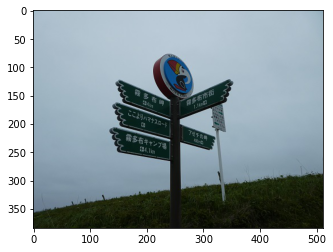

In [1]:
from skimage import io
import matplotlib.pyplot as plt
im = io.imread("./res/P1030312.JPG")
plt.imshow(im)

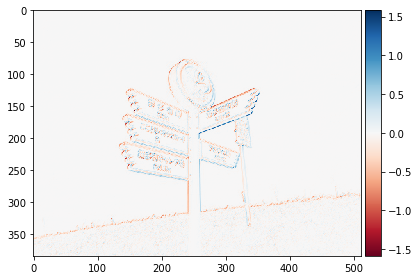

In [2]:
from scipy import ndimage as ndi
import numpy as np
imf = im[:, :, 0].astype(float) / 255
diff2d = np.array([
    [0, 1, 0],
    [1, 0, -1],
    [0, -1, 0]
]) # filter
imf_edges = ndi.convolve(imf, diff2d)
io.imshow(imf_edges)

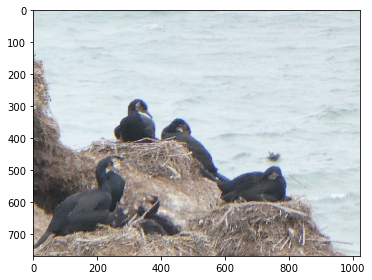

In [3]:
# 同じセグメントに所属していると確信が持てる小さな領域（スーパーピクセル）同士の併合によって領域を見つける手法
birds = io.imread("./res/P1030284.JPG")
io.imshow(birds)

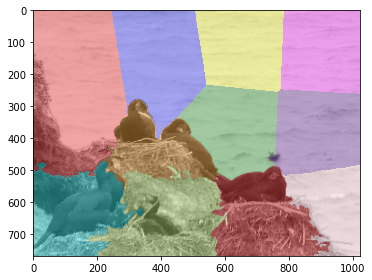

In [4]:
from skimage import segmentation, color
seg = segmentation.slic(birds, n_segments = 10, compactness = 40, enforce_connectivity = True, sigma = 3)
io.imshow(color.label2rgb(seg, birds))

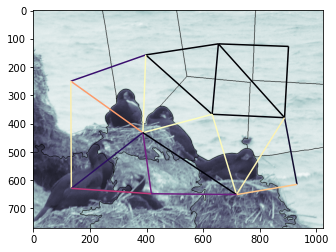

In [5]:
from skimage.future import graph
g = graph.rag_mean_color(birds, seg)
graph.show_rag(seg, g, birds)

In [50]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
print(a[0:len(a):1])

[1 2 3 4 5 6]
